![Regression Example](./images/example_regression_banner.png)

# Regression Example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## 1. Data Collection

In this example, we are going to generate our own data - so there will be no data collection step per se.

## 2. Data Exploration and Preparation

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random input data (X)
X = np.random.rand(100, 1) # Random values between 0 and 1

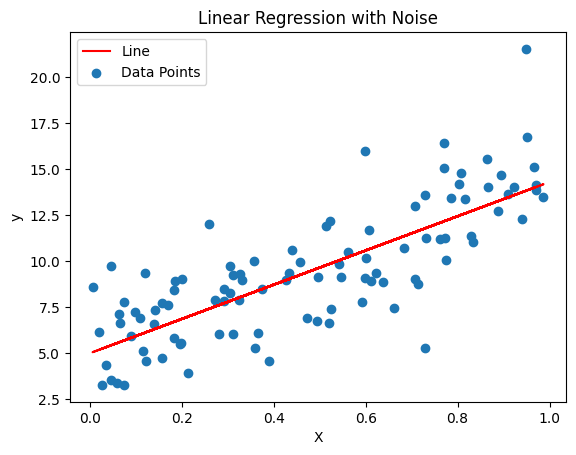

In [4]:
# Generate true coefficients (slope and intercept)
true_slope = 9.3
true_intercept = 5

# Calculate true output (y) based on the linear model
y_true = true_slope * X + true_intercept

# Add noise to the output
noise = np.random.normal(0, 2, size=y_true.shape)  # Gaussian noise with mean 0 and std 2
y = y_true + noise

# Plot the data
plt.plot(X, y_true, c='red', label='Line')
plt.scatter(X, y, label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Noise')
plt.legend()
plt.show()

## 3. Split Data into Training and Test Sets

In [7]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    random_state=42,
)

## 4. Choose an algorithm

### Linear Regression

![Linear regression](./images/example_regression_linear.png)

Regression analysis is a statistical technique used to model the relationship between a dependent variable and one or more independent variables.

The main goals of regression analysis are:
- To estimate the effect of the independent variable(s) on the dependent variable. This allows us to understand how changes in the independent variable(s) influence the dependent variable.
- To predict the value of the dependent variable based on the values of the independent variable(s). This is useful when we want to forecast or estimate an outcome based on known predictor values.

Key Concepts:
- **Simple Linear Regression**: Models the linear relationship between a single independent variable ($X$) and a dependent variable ($Y$). The equation is: $Y = \beta_0 + \beta_1 X + \epsilon$, where $\beta_0$ is the intercept, $\beta_1$ is the slope coefficient, and $\epsilon$ is the error term.
- **Multiple Linear Regression**: Extends simple linear regression to include multiple independent variables ($X_1$, $X_2$, ..., $Xn$). The equation is: $Y = \beta_0 + \beta_1 \, X_1 + \beta_2 \, X_2 + \epsilon$, where $\beta_i$ represents the effect of $X_i$ on $Y$, holding all other variables constant.
- **Least Squares Method**: The regression coefficients ($\beta_0$, $\beta_1$, ..., $\beta_n$) are estimated using the least squares method, which minimizes the sum of squared residuals (differences between observed and predicted values).
- **Residuals**: The differences between the observed values of the dependent variable and the values predicted by the regression model. Residuals are used to assess the fit of the model and estimate the variance of the error term.
- **Coefficient of Determination (R-squared)**: A measure of how well the regression model fits the data, ranging from 0 to 1. Higher values indicate a better fit.

Linear regression aims to find the best-fitting line or hyperplane that minimizes the sum of squared residuals between the observed data points and the predicted values from the model. The residuals represent the vertical distances between the actual data points and the fitted line or plane.

The objective function that linear regression tries to minimize is the Residual Sum of Squares (RSS):

\begin{equation*}
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation*}
 
Where:
- $n$ is the number of data points
- $y_i$ is the observed value of the dependent variable for data point $i$
- $\hat{y}_i$ is the predicted value from the linear regression model for data point $i$

To find the optimal parameter values (coefficients) that minimize the RSS, linear regression typically uses one of the following methods:

- **Ordinary Least Squares (OLS)**: This analytical method directly solves for the coefficient values that minimize the RSS. For simple linear regression, the solution can be found using calculus. For multiple linear regression, the solution involves matrix algebra operations.
- **Gradient Descent**: This iterative optimization algorithm starts with initial guesses for the coefficients and updates them iteratively by taking steps in the opposite direction of the gradient (derivative) of the RSS with respect to each coefficient. The step size is controlled by a learning rate hyperparameter.

\begin{equation*}
\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} \left( \text{RSS} \right)
\end{equation*}

Where:
- $\beta_j$ is the current value of the $j$-th coefficient
- $\alpha$ is the learning rate (step size)
- $\frac{\partial}{\partial \beta_j} \left( \text{RSS} \right)$ is the partial derivative of the RSS with respect to $\beta_j$

The partial derivatives provide the gradients, indicating the direction in which the coefficients should be updated to decrease the RSS. The learning rate determines the step size in that direction. This process is repeated until convergence, ideally reaching the global minimum of the RSS.

## 5-7. Train the Model, Evaluate Model Performance and Model Tuning and Selection

In [10]:
def compute_cost(coeffs, points, degree):
    total_cost = 0
    N = float(len(points))

    # Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i][0]
        y_pred = 0
        for j in range(degree + 1):
            y_pred += coeffs[j] * x ** j

        y = points[i][1]

        total_cost += (y - y_pred) ** 2

    # Return average of squared error
    return total_cost / N

def step_gradient(coeffs, points, learning_rate, degree):
    N = float(len(points))
    new_coeffs = [0] * (degree + 1)

    # Calculate Gradient
    for i in range(0, len(points)):
        x = points[i][0]
        y_pred = 0
        for j in range(degree + 1):
            y_pred += coeffs[j] * x ** j

        y = points[i][1]
        for j in range(degree + 1):
            new_coeffs[j] += - (2 / N) * (y - y_pred) * x ** j

    # Update current coefficients
    for j in range(degree + 1):
        new_coeffs[j] = coeffs[j] - learning_rate * new_coeffs[j]

    # Return updated coefficients
    return new_coeffs

def gradient_descent_runner(points, degree, learning_rate, num_iterations):
    coeffs = [0] * (degree + 1)  # Initialize coefficients to 0
    cost_graph = []

    # For every iteration, optimize coefficients and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(coeffs, points, degree))
        coeffs = step_gradient(coeffs, points, learning_rate, degree)

    return coeffs, cost_graph

In [11]:
data = [[a[0], b[0]] for a, b in zip(X_train.tolist(), y_train.tolist())]

In [12]:
data[0]

[0.9218742350231168, 14.006347564878936]

### Experiments

#### Start with a week linear regression

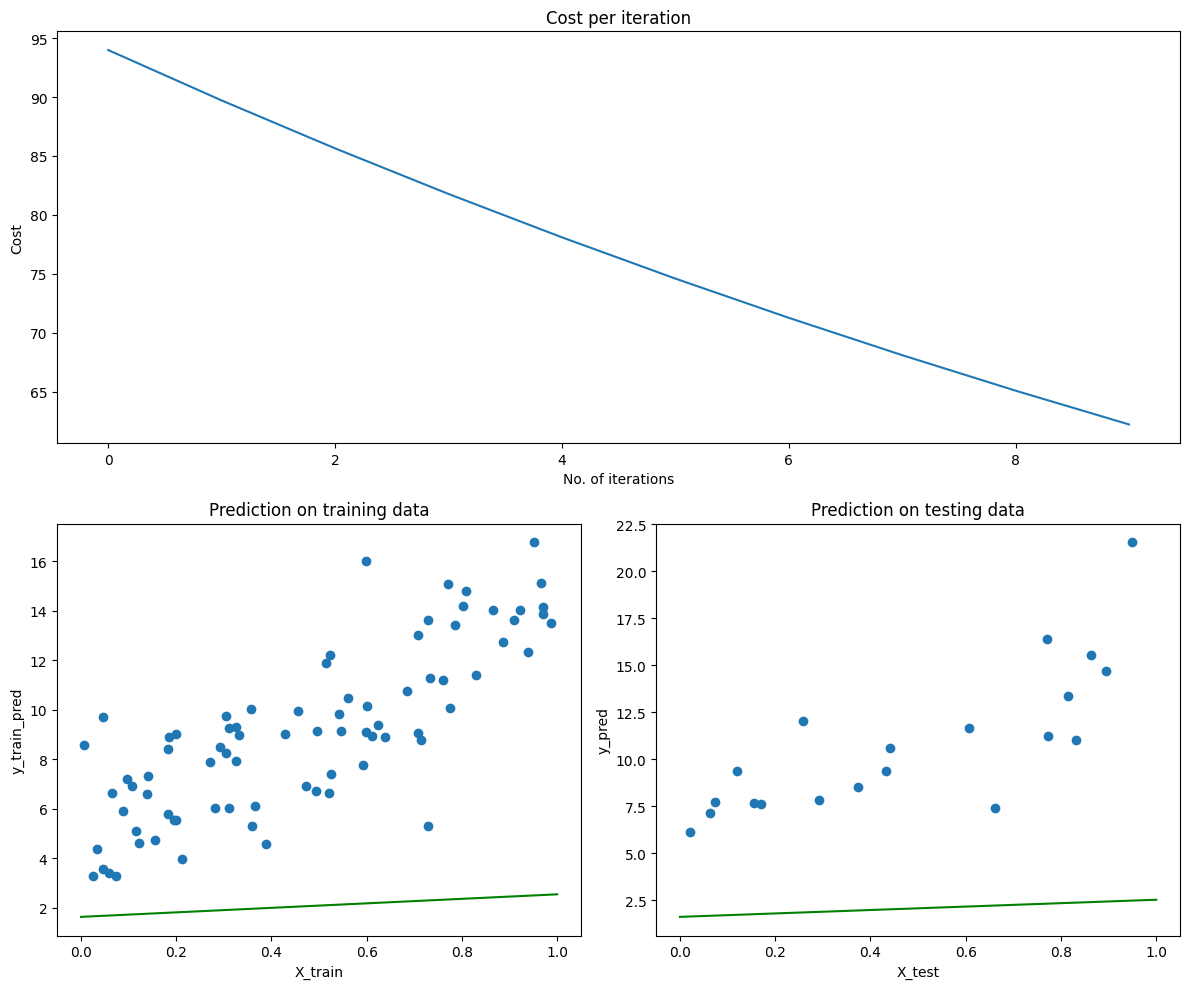

Optimized coefficients: [1.6258330923426711, 0.9104872765999472]
Minimized cost: 59.51012516718863


In [13]:
# Gradient Descent
num_poly = 1
learning_rate = 0.01
initial_b = 0
initial_m = 0
num_iterations = 10

# Train the model
coeffs, cost_graph = gradient_descent_runner(
    data,
    num_poly,
    learning_rate,
    num_iterations
)

x_pred = np.linspace(0, 1, 100)
y_pred = []
for x in x_pred:
    y = 0
    for i, coeff in enumerate(coeffs):
        y += coeff * x ** i
    y_pred.append(y)

# Plot the cost graph
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(cost_graph)
ax1.set_xlabel('No. of iterations')
ax1.set_ylabel('Cost')
ax1.set_title('Cost per iteration')

# Create two subplots in the second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_train, y_train)
ax2.plot(x_pred, y_pred, c='g')
ax2.set_xlabel('X_train')
ax2.set_ylabel('y_train_pred')
ax2.set_title('Prediction on training data')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_test, y_test)
ax3.plot(x_pred, y_pred, c='g')
ax3.set_xlabel('X_test')
ax3.set_ylabel('y_pred')
ax3.set_title('Prediction on testing data')

plt.tight_layout()
plt.show()

# Print error with optimized parameters
print("Optimized coefficients:", coeffs)
print ('Minimized cost:', compute_cost(coeffs, data, num_poly))

#### Demonstrate how a large learning rate can lead to divergence

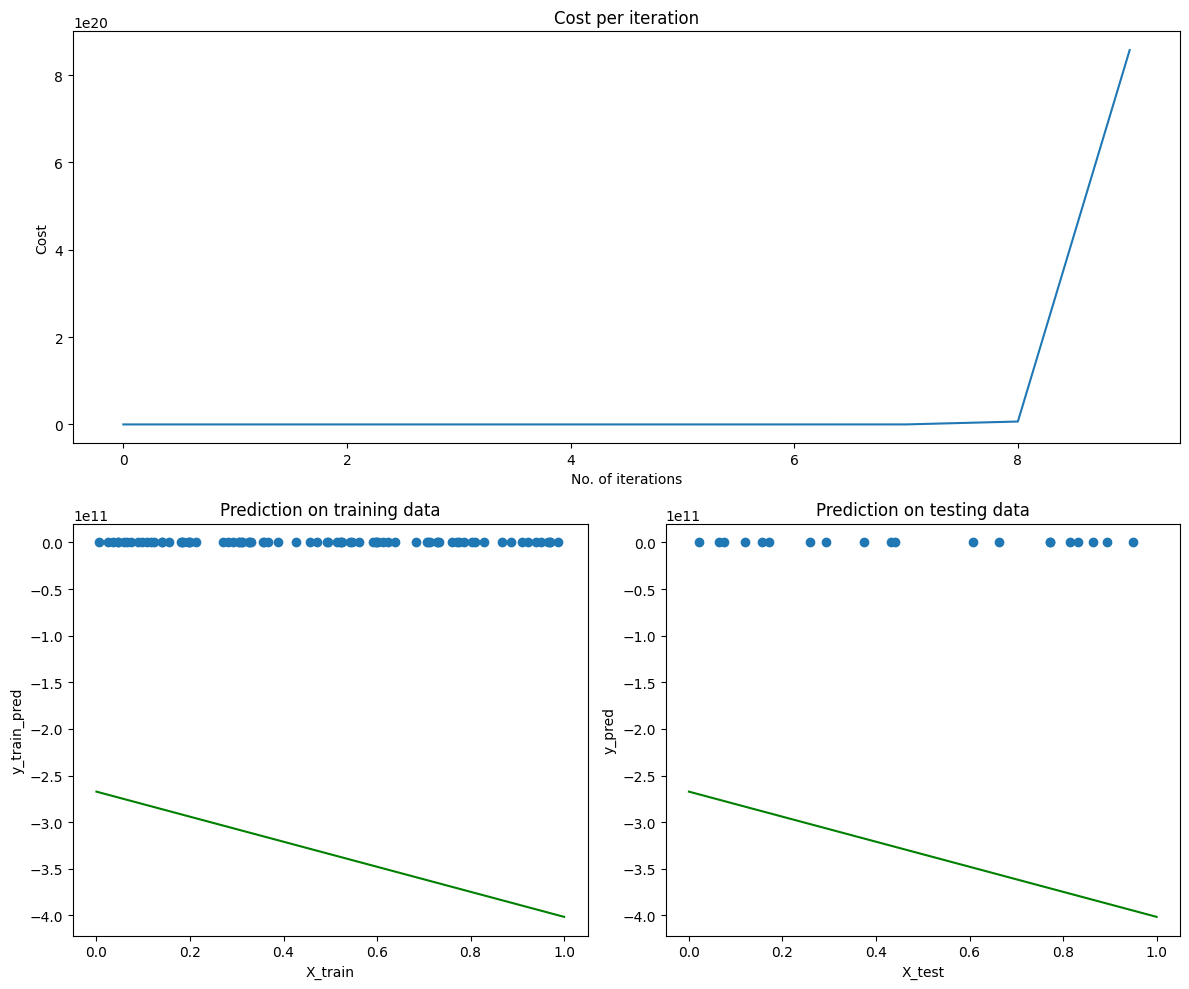

Optimized coefficients: [-267261075072.52658, -134327834715.1265]
Minimized cost: 1.1052268386403429e+23


In [14]:
# Gradient Descent
num_poly = 1
learning_rate = 5
initial_b = 0
initial_m = 0
num_iterations = 10

# Train the model
coeffs, cost_graph = gradient_descent_runner(
    data,
    num_poly,
    learning_rate,
    num_iterations
)

x_pred = np.linspace(0, 1, 100)
y_pred = []
for x in x_pred:
    y = 0
    for i, coeff in enumerate(coeffs):
        y += coeff * x ** i
    y_pred.append(y)

# Plot the cost graph
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(cost_graph)
ax1.set_xlabel('No. of iterations')
ax1.set_ylabel('Cost')
ax1.set_title('Cost per iteration')

# Create two subplots in the second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_train, y_train)
ax2.plot(x_pred, y_pred, c='g')
ax2.set_xlabel('X_train')
ax2.set_ylabel('y_train_pred')
ax2.set_title('Prediction on training data')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_test, y_test)
ax3.plot(x_pred, y_pred, c='g')
ax3.set_xlabel('X_test')
ax3.set_ylabel('y_pred')
ax3.set_title('Prediction on testing data')

plt.tight_layout()
plt.show()

# Print error with optimized parameters
print("Optimized coefficients:", coeffs)
print ('Minimized cost:', compute_cost(coeffs, data, num_poly))

#### Show how increasing number of iterations converge to the best fit

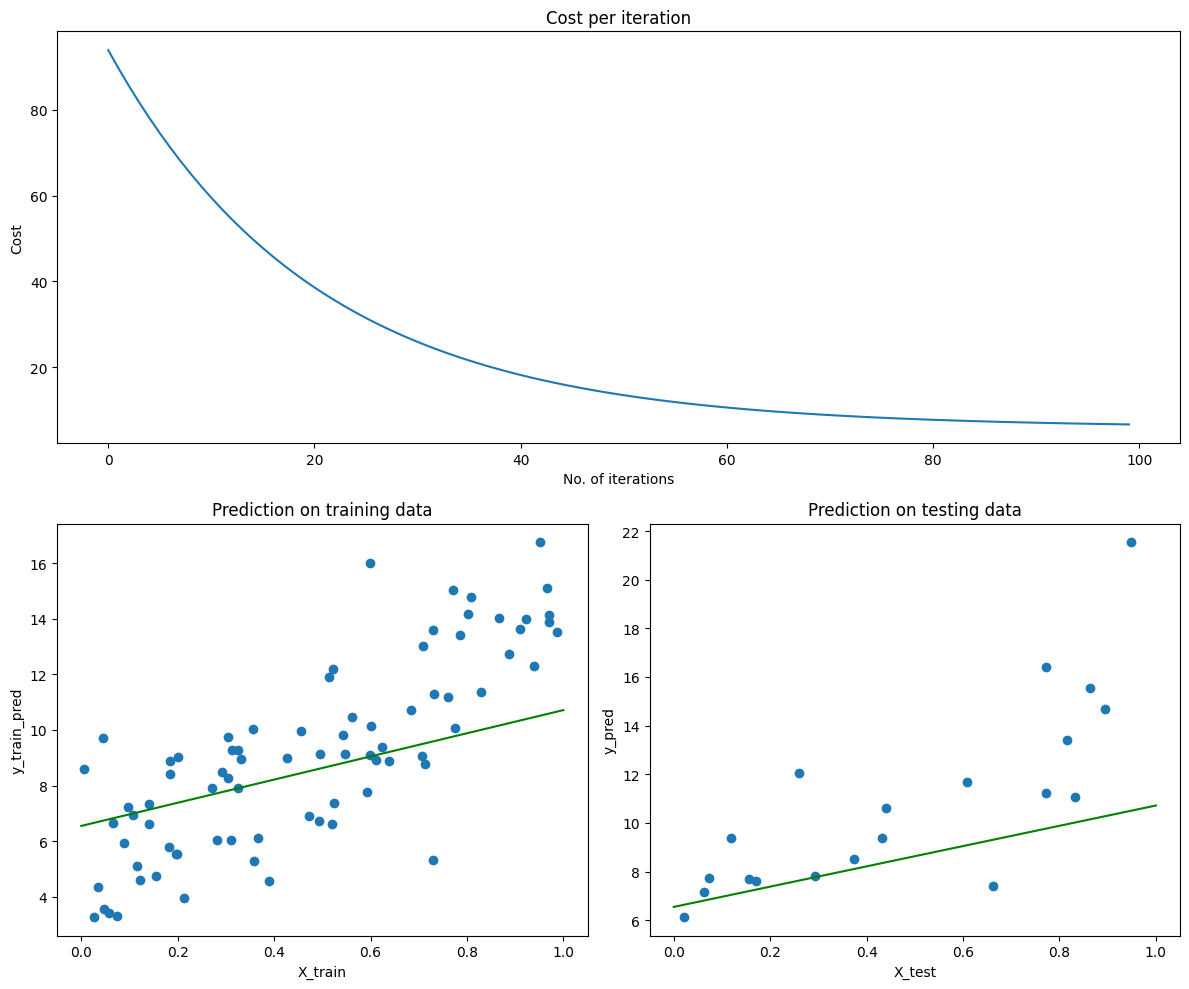

Optimized coefficients: [6.547006810301134, 4.1685916842545385]
Minimized cost: 6.562312380634078


In [15]:
# Gradient Descent
num_poly = 1
learning_rate = 0.01
initial_b = 0
initial_m = 0
num_iterations = 100

# Train the model
coeffs, cost_graph = gradient_descent_runner(
    data,
    num_poly,
    learning_rate,
    num_iterations
)

x_pred = np.linspace(0, 1, 100)
y_pred = []
for x in x_pred:
    y = 0
    for i, coeff in enumerate(coeffs):
        y += coeff * x ** i
    y_pred.append(y)

# Plot the cost graph
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(cost_graph)
ax1.set_xlabel('No. of iterations')
ax1.set_ylabel('Cost')
ax1.set_title('Cost per iteration')

# Create two subplots in the second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_train, y_train)
ax2.plot(x_pred, y_pred, c='g')
ax2.set_xlabel('X_train')
ax2.set_ylabel('y_train_pred')
ax2.set_title('Prediction on training data')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_test, y_test)
ax3.plot(x_pred, y_pred, c='g')
ax3.set_xlabel('X_test')
ax3.set_ylabel('y_pred')
ax3.set_title('Prediction on testing data')

plt.tight_layout()
plt.show()

# Print error with optimized parameters
print("Optimized coefficients:", coeffs)
print ('Minimized cost:', compute_cost(coeffs, data, num_poly))

#### Show how keeping increasing number of iterations converge to the best fit

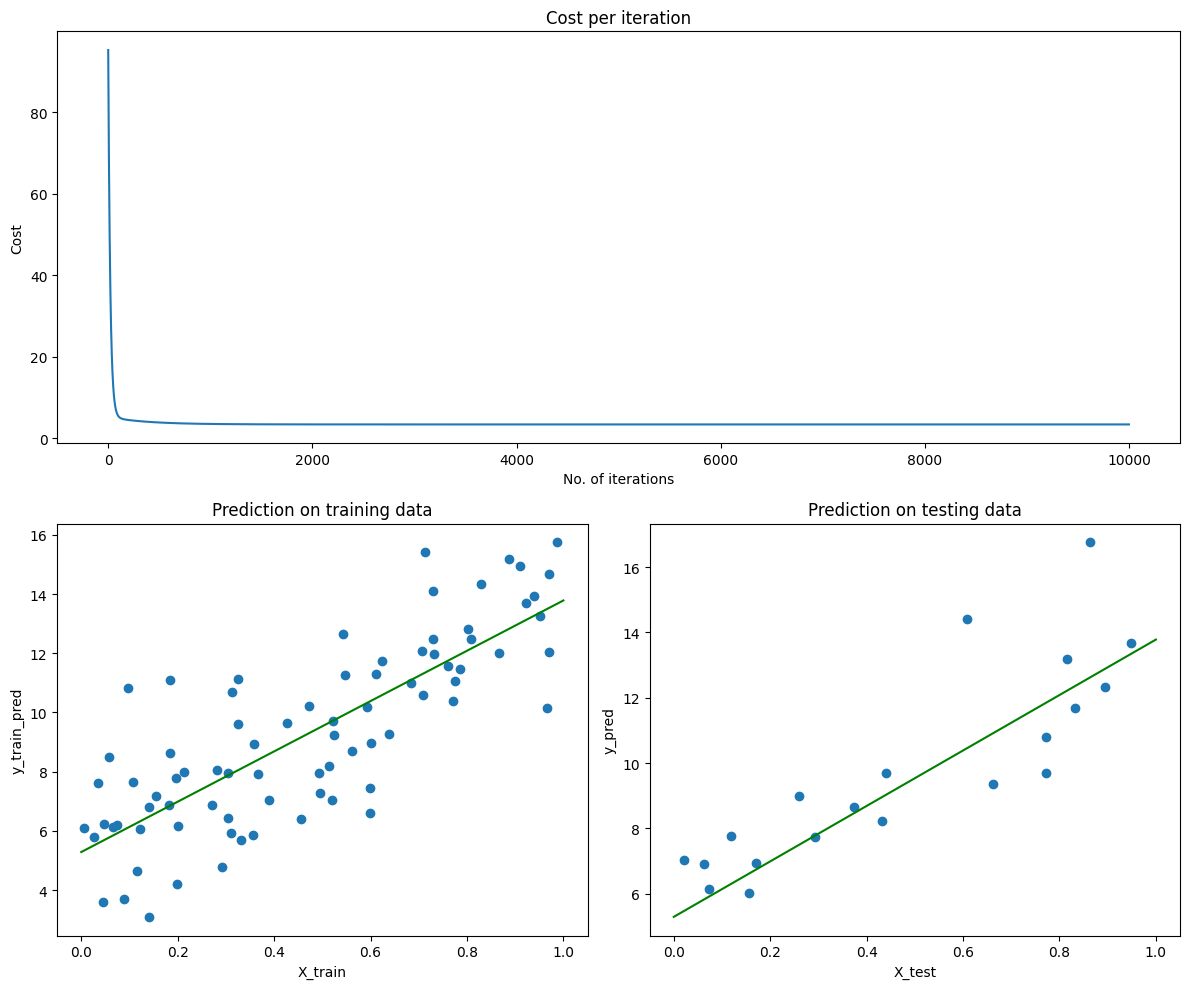

Optimized coefficients: [5.285829161266718, 8.497289611409025]
Minimized cost: 3.3907154256860492


In [16]:
# Gradient Descent
num_poly = 1
learning_rate = 0.01
initial_b = 0
initial_m = 0
num_iterations = 10000

# Train the model
coeffs, cost_graph = gradient_descent_runner(
    data,
    num_poly,
    learning_rate,
    num_iterations
)

x_pred = np.linspace(0, 1, 100)
y_pred = []
for x in x_pred:
    y = 0
    for i, coeff in enumerate(coeffs):
        y += coeff * x ** i
    y_pred.append(y)

# Plot the cost graph
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(cost_graph)
ax1.set_xlabel('No. of iterations')
ax1.set_ylabel('Cost')
ax1.set_title('Cost per iteration')

# Create two subplots in the second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_train, y_train)
ax2.plot(x_pred, y_pred, c='g')
ax2.set_xlabel('X_train')
ax2.set_ylabel('y_train_pred')
ax2.set_title('Prediction on training data')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_test, y_test)
ax3.plot(x_pred, y_pred, c='g')
ax3.set_xlabel('X_test')
ax3.set_ylabel('y_pred')
ax3.set_title('Prediction on testing data')

plt.tight_layout()
plt.show()

# Print error with optimized parameters
print("Optimized coefficients:", coeffs)
print ('Minimized cost:', compute_cost(coeffs, data, num_poly))

#### This model doesn't overfit because it's too simple and there quite a few data points, let's illustrate that by increasing model complexity, it starts overfitting to training data

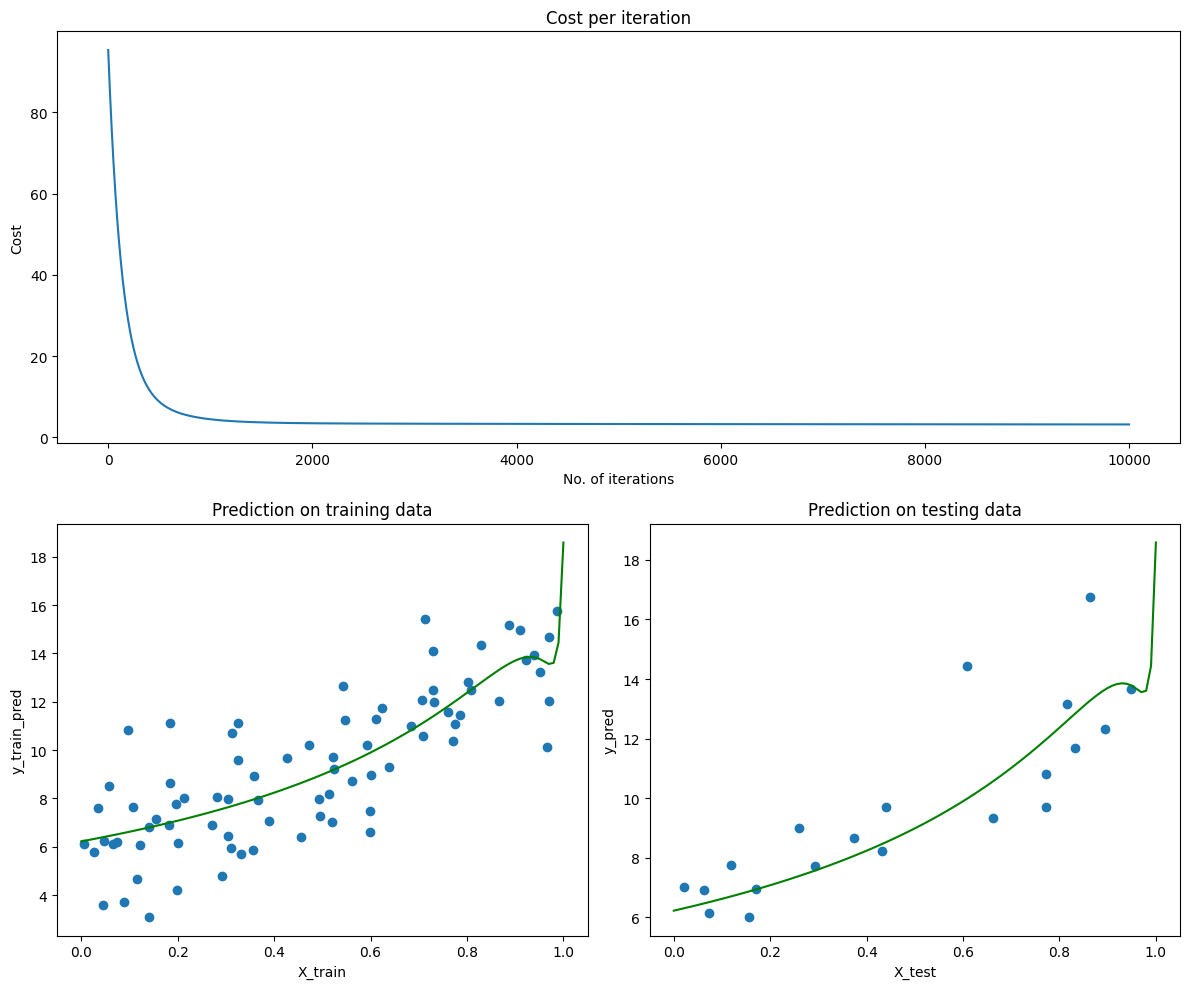

Optimized coefficients: [6.22030274516124, 3.7149110833423955, 2.4150699341367527, 1.6218306524511445, 1.0915817878781522, 0.7206971915357424, 0.45513491138353607, 0.26250970135249424, 0.12177334001681073, 0.018602418144716696, -0.05702253057983126, -0.11223963359200205, -0.15220357130502743, -0.18067789148900223, -0.20043695761219116, -0.21354403704654823, -0.22154644369327678, -0.22561400343698054, -0.22663820926172742, -0.22530379210102514, -0.22214075152410398, -0.21756243372310546, -0.21189357725203664, -0.20539110045025047, -0.19825960725623148, -0.1906630287220539, -0.18273342203484222, -0.17457766741568792, -0.16628260188436733, -0.15791898407084048, -0.14954457966598939, -0.14120658125128463, -0.1329435210171691, -0.12478679450871574, -0.11676188391091656, -0.10888934755677396, -0.10118562618927643, -0.09366370450370141, -0.08633365753261647, -0.07920310470893135, -0.07227758936752907, -0.06556089759619273, -0.05905532740903159, -0.05276191696049785, -0.04668063877585519, -0.0

In [17]:
# Gradient Descent
num_poly = 200
learning_rate = 0.001
initial_b = 0
initial_m = 0
num_iterations = 10000

# Train the model
coeffs, cost_graph = gradient_descent_runner(
    data,
    num_poly,
    learning_rate,
    num_iterations
)

x_pred = np.linspace(0, 1, 100)
y_pred = []
for x in x_pred:
    y = 0
    for i, coeff in enumerate(coeffs):
        y += coeff * x ** i
    y_pred.append(y)

# Plot the cost graph
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(cost_graph)
ax1.set_xlabel('No. of iterations')
ax1.set_ylabel('Cost')
ax1.set_title('Cost per iteration')

# Create two subplots in the second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(X_train, y_train)
ax2.plot(x_pred, y_pred, c='g')
ax2.set_xlabel('X_train')
ax2.set_ylabel('y_train_pred')
ax2.set_title('Prediction on training data')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(X_test, y_test)
ax3.plot(x_pred, y_pred, c='g')
ax3.set_xlabel('X_test')
ax3.set_ylabel('y_pred')
ax3.set_title('Prediction on testing data')

plt.tight_layout()
plt.show()

# Print error with optimized parameters
print("Optimized coefficients:", coeffs)
print ('Minimized cost:', compute_cost(coeffs, data, num_poly))